In [2]:
import pandas as pd

In [3]:
weather_data = pd.read_csv("../Data/daily_weatherdata_2022.csv", header = 0, sep=',')
print(weather_data.head())


   Year  Month  Day  LC_HUMIDITY  LC_DWPTEMP       LC_n     LC_RAD  LC_RAININ   
0  2022      1    1    86.557205   10.257703  36.346609  21.264531   0.000002  \
1  2022      1    2    83.512460    9.379296  36.056435  14.140794   0.000658   
2  2022      1    3    89.579036    8.004425  35.882086   5.529369   0.000750   
3  2022      1    4    94.288450    5.983424  35.816041   7.944379   0.000469   
4  2022      1    5    88.026102    2.078484  35.573298  13.893690   0.000131   

   LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED      Hour     Minute   LC_RAD60   
0      0.000029   -6.567639      0.322477  11.58042  25.174825  21.396634  \
1      0.003468  -28.866315      0.721487  11.50000  25.000000  14.099483   
2      0.006831  -35.256016      0.663436  11.50000  25.000000   5.517430   
3      0.003571  -25.637291      0.333304  11.50000  25.000000   7.962571   
4      0.000262  -44.342911      0.609569  11.50000  25.000000  13.890103   

   LC_TEMP_QCL0  LC_TEMP_QCL1  LC_TEMP_QCL2  LC_TE

In [8]:
#print(weather_data['LC_DAILYRAIN'])

#theoretically 0.2mm or more is a rainy day

min_rain = min(weather_data["LC_DAILYRAIN"])
mean_rain = weather_data["LC_DAILYRAIN"].mean()
max_rain = max(weather_data["LC_DAILYRAIN"])

print(f"the maximum rain is {round(max_rain,5)},\n the minimum is {round(min_rain,5)}\n and the average is {round(mean_rain,5)} all expressed in mm and it is daily")

the maximum rain is 0.02097,
 the minimum is 0.0
 and the average is 0.0012 all expressed in mm and it is daily


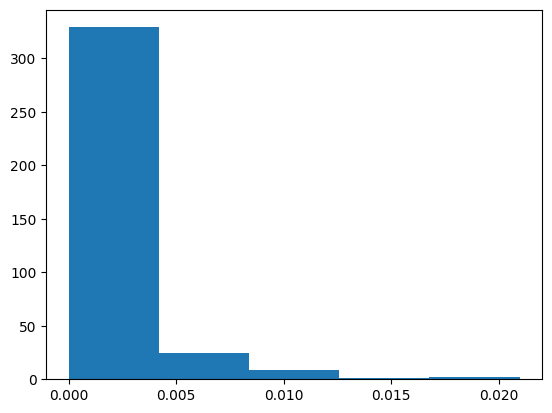

In [12]:
import matplotlib.pyplot as plt

number_of_bins = 5

plt.hist(weather_data["LC_DAILYRAIN"], bins=number_of_bins)
plt.show()

In [19]:
#apparently 144 precipiatation days in Belgium 2022
#https://www.thebulletin.be/2022-was-belgiums-second-hottest-and-driest-record-after-2020#:~:text=%E2%80%9CThe%20number%20of%20precipitation%20days,period%201991%2D2020).%E2%80%9D

rain_days = weather_data["LC_DAILYRAIN"]

print(rain_days)

sorted_rain_days = rain_days.sort_values(ascending=False).array

print(sorted_rain_days)


0      0.000029
1      0.003468
2      0.006831
3      0.003571
4      0.000262
         ...   
361    0.001504
362    0.009915
363    0.002715
364    0.000983
365    0.000000
Name: LC_DAILYRAIN, Length: 366, dtype: float64
<PandasArray>
[ 0.020973337833277,  0.017167374041621, 0.0126690164261488,
 0.0113924119241192, 0.0111424802110817, 0.0110150038561312,
 0.0106897330322752, 0.0106758685070347, 0.0099151156232374,
 0.0099013479582397,
 ...
                0.0,                0.0,                0.0,
                0.0,                0.0,                0.0,
                0.0,                0.0,                0.0,
                0.0]
Length: 366, dtype: float64


In [26]:
#get cutoff values

cutoff_rain_day_144 = sorted_rain_days[143] #144th value

print(cutoff_rain_day_144)

#I think the data is in meters and not in mm

#cutoff value 0.2mm
cutoff_rain_day = 0.0002

0.0001954542388885


In [28]:
#add column to dataframe (in the script, not in the real dataset)

weather_data["bool_rainday"] = weather_data["LC_DAILYRAIN"] > cutoff_rain_day

weather_data.head()

,Year,Month,Day,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,Hour,Minute,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,bool_rainday
0,2022,1,1,86.557205,10.257703,36.346609,21.264531,0.000002,0.000029,-6.567639,0.322477,11.58042,25.174825,21.396634,12.447359,12.464281,12.450807,12.424740,False
1,2022,1,2,83.512460,9.379296,36.056435,14.140794,0.000658,0.003468,-28.866315,0.721487,11.50000,25.000000,14.099483,12.112883,12.115685,12.102359,12.086891,True
2,2022,1,3,89.579036,8.004425,35.882086,5.529369,0.000750,0.006831,-35.256016,0.663436,11.50000,25.000000,5.517430,9.646861,9.648249,9.635166,9.683051,True
3,2022,1,4,94.288450,5.983424,35.816041,7.944379,0.000469,0.003571,-25.637291,0.333304,11.50000,25.000000,7.962571,6.830167,6.828260,6.816515,6.837235,True
4,2022,1,5,88.026102,2.078484,35.573298,13.893690,0.000131,0.000262,-44.342911,0.609569,11.50000,25.000000,13.890103,3.903085,3.900556,3.890475,3.915760,True
